# Startup Transformation
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.  

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:  
- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?   

_Data files:_
- employees.csv
- expenses.csv
- financial_data.csv


In [257]:
# load libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

In [59]:
# load data files with specified encoding
financial_data = pd.read_csv('financial_data.csv')
employees_data = pd.read_csv('employees.csv', encoding='latin1')
expenses_data = pd.read_csv('expenses.csv')

# inspect data
print('Dimensions of financial_data: ', financial_data.shape) # (6, 3)
print('Headers of financial_data: ', financial_data.columns) # ['Month', 'Revenue', 'Expenses']
print(financial_data.dtypes)
print(financial_data.describe())
display(financial_data)
print('Dimensions of expenses_data: ', expenses_data.shape) # (7, 2)
print('Headers of expenses_data: ', expenses_data.columns) # ['Expense', 'Proportion']
print(expenses_data.dtypes) 
print(expenses_data.describe())
display(expenses_data)
print('Dimensions of employees_data: ', employees_data.shape) # (300, 4)
print('Headers of employees_data: ', employees_data.columns) # ['Name', 'Salary', 'Productivity', 'Commute Time']
print(employees_data.dtypes) 
print(employees_data.describe())
display(employees_data)

Dimensions of financial_data:  (6, 3)
Headers of financial_data:  Index(['Month', 'Revenue', 'Expenses'], dtype='object')
Month       int64
Revenue     int64
Expenses    int64
dtype: object
          Month       Revenue       Expenses
count  6.000000  6.000000e+00       6.000000
mean   3.500000  1.019500e+06  579500.000000
std    1.870829  2.602566e+05   55619.241275
min    1.000000  7.200000e+05  510000.000000
25%    2.250000  8.352500e+05  536750.000000
50%    3.500000  9.850000e+05  581500.000000
75%    4.750000  1.162500e+06  624000.000000
max    6.000000  1.420000e+06  644000.000000


,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000
5,6,720000,644000


Dimensions of expenses_data:  (7, 2)
Headers of expenses_data:  Index(['Expense', 'Proportion'], dtype='object')
Expense        object
Proportion    float64
dtype: object
       Proportion
count    7.000000
mean     0.142857
std      0.219295
min      0.010000
25%      0.020000
50%      0.030000
75%      0.150000
max      0.620000


,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


Dimensions of employees_data:  (300, 4)
Headers of employees_data:  Index(['Name', 'Salary', 'Productivity', 'Commute Time'], dtype='object')
Name             object
Salary            int64
Productivity    float64
Commute Time    float64
dtype: object
              Salary  Productivity  Commute Time
count     300.000000    300.000000    300.000000
mean   111766.173333     50.989100     33.441700
std     48620.292962     28.437686     16.128369
min     30530.000000      0.060000      3.220000
25%     68748.750000     27.830000     21.667500
50%    111064.000000     49.755000     31.060000
75%    153946.000000     75.810000     42.190000
max    197081.000000     99.980000    101.780000


,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58
...,...,...,...,...
295,Delmy Conatser,55465,52.61,54.34
296,Thomas Sams,160453,12.15,58.05
297,Lisabeth Naslund,164297,85.84,38.18
298,Devorah Hooser,148398,76.27,12.16


The data is structured as follows:  

__financial_data:__    
Dimenions: 6 rows x 3 columns   
Variables:   
- Month(int64): quantitative ordinal variable; Months of the year numbered 1 to 6
- Revenue(int64): quantitative variable; Annual revenues ranging 720000-1420000
- Expenses(int64): quantitative variable; Annual expenses ranging 510000-644000

__expenses_data:__  
Dimensions: 7 rows x 2 columns
Variables:   
- Expense(object): nominal variable; items for which the company spends money (e.g. Salaries) 
- Proportion(float64): quantitative variable; proportion of expenses for each item ranging 0.1-0.62

__employees_data:__  
Dimensions: 300 rows x 4 columns
Variables:  
- Name(object): nominal variable; First and Last Names of employees (e.g. Mason Pender)
- Salary(int64):  quantitative variable; Employee annual salary ranging 30530-197081
- Productivity(float64): quantitative variable; Employee's productivity in percent ranging 0.06-99.98
- Commute Time(float64): quantitative variable; Employee's commute time to work in minutes ranging 3.2-101.8

## Analyzing Revenue and Expenses
### Task 1
The management team of the company you work for is concerned about the status of the company after a global pandemic.  
The CFO (Chief Financial Officer) asks you to perform some data analysis on the past six months of the company’s financial data, which has been loaded in the variable financial_data.  
First, examine the first few rows of the data using print() and .head().
### Task 2
Notice that financial_data has three columns – Month, Revenue, and Expenses.  
Store each column in three separate variables called month, revenue, and expenses.  

In [25]:
# Store each financial_data column in three separate variables called month, revenue, and expenses
print('Headers of financial_data: ', financial_data.columns) # ['Month', 'Revenue', 'Expenses']
print(financial_data.head())
month = financial_data.Month
revenue = financial_data.Revenue
expenses = financial_data.Expenses
print(month.head())
print(revenue.head())
print(expenses.head())

Headers of financial_data:  Index(['Month', 'Revenue', 'Expenses'], dtype='object')
   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000
0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64
0    1420000
1    1200000
2    1050000
3     920000
4     807000
Name: Revenue, dtype: int64
0    510000
1    532000
2    551000
3    612000
4    628000
Name: Expenses, dtype: int64


### Tasks 3-4
Plot a revenue over the past 6 months.

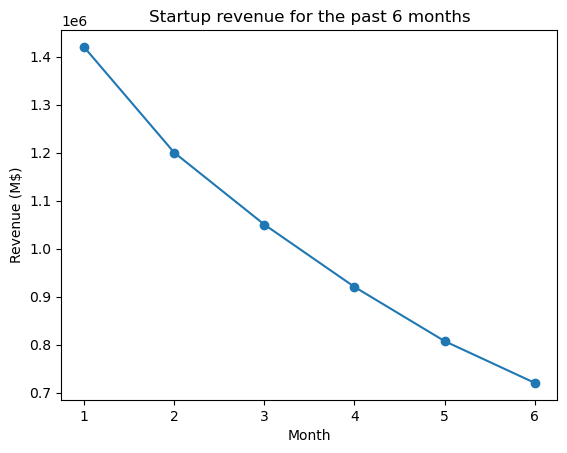

In [45]:
# plot revenue per month
plt.plot(month, revenue, marker='o')
plt.title('Startup revenue for the past 6 months')
plt.xlabel('Month')
plt.ylabel('Revenue (M$)')
plt.show()
plt.clf()

### Task 5
Repeat steps 3 and 4 for monthly expenses.

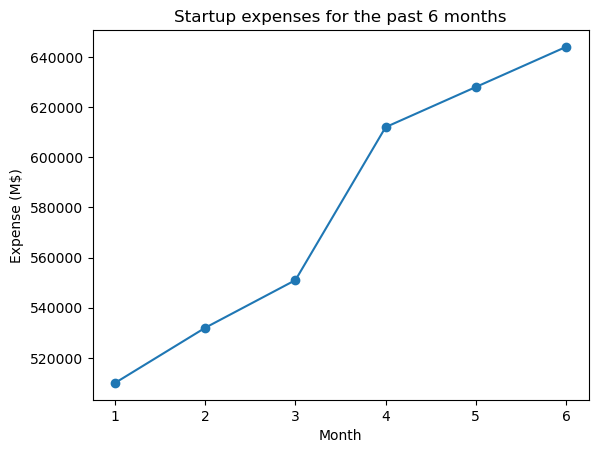

<Figure size 640x480 with 0 Axes>

In [47]:
# plot expenses per month
plt.plot(month, expenses, marker='o')
plt.title('Startup expenses for the past 6 months')
plt.xlabel('Month')
plt.ylabel('Expense (M$)')
plt.show()
plt.clf()

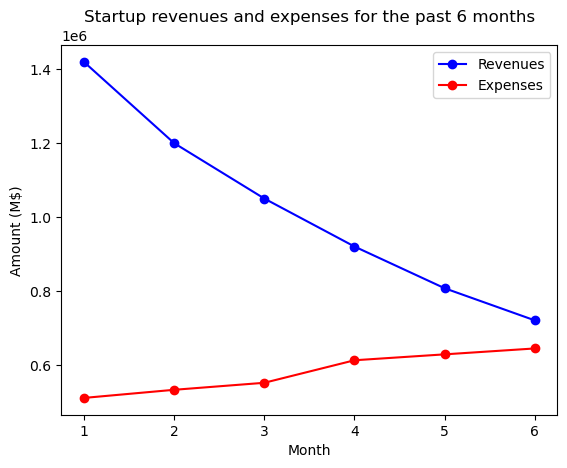

<Figure size 640x480 with 0 Axes>

In [69]:
# Superimpose lineplots
plt.plot(month, revenue, marker='o', color='blue')
plt.plot(month, expenses, marker='o', color='red')
plt.title('Startup revenues and expenses for the past 6 months')
plt.xlabel('Month')
plt.ylabel('Amount (M$)')
plt.legend(labels=['Revenues','Expenses'])
plt.show()
plt.clf()

Start-up revenues decrease as expenses increase over the past 6 months. One probably explains the other.  
### Task 6
As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.  
After you show this chart to the management team, they are alarmed. They conclude that expenses must be cut immediately and give you a new file to analyze called expenses.csv.  
Use pandas to read in expenses.csv and store it in a variable called expense_overview.  
Print the first seven rows of the data.  

In [57]:
# inspect expenses_data
print('Headers of expenses_data: ', expenses_data.columns) # ['Expense', 'Proportion']
print(expenses_data.head(7))

Headers of financial_data:  Index(['Expense', 'Proportion'], dtype='object')
       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01


## Pie Chart and Collapsing Categories
### Task 7
Notice that there are two columns: 
- Expense: indicates the expense category
- Proportion: indicates how much of the overall expenses a specific category takes up  

In [76]:
# Store the Expense column in a variable called expense_categories and the Proportion column in a variable called proportions.
expense_categories = expenses_data.Expense
expense_proportions = expenses_data.Proportion
print(expense_categories)
print(expense_proportions)

0       Salaries
1    Advertising
2    Office Rent
3      Equipment
4      Utilities
5        Supples
6           Food
Name: Expense, dtype: object
0    0.62
1    0.15
2    0.15
3    0.03
4    0.03
5    0.01
6    0.01
Name: Proportion, dtype: float64


### Tasks 8-9
Create a pie chart of the different expense categories.

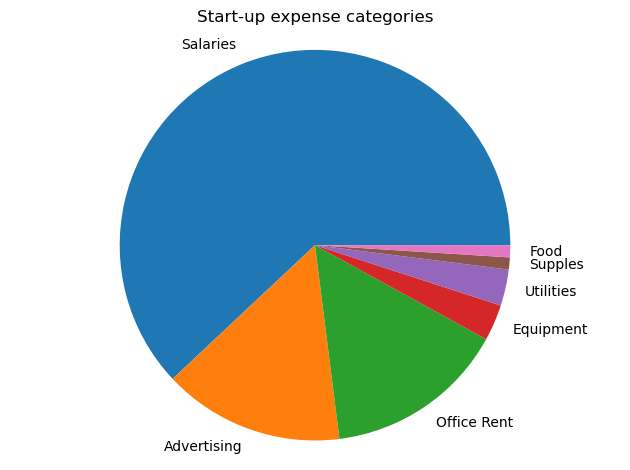

In [79]:
# Pie chart of all expenses
plt.pie(expense_proportions, labels=expense_categories)
plt.title('Start-up expense categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

62% of expenses cover salaries, followed by advertising and office rent (both at 15%).  
Food and supplies account for 1 % of expenses.
### Task 10
It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage.  
Before you hand this pie chart back to management, you would like to update the pie chart so that all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category.  
Update the pie chart accordingly.

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3        Other        0.03
4        Other        0.03
5        Other        0.01
6        Other        0.01
['Salaries' 'Advertising' 'Office Rent' 'Other']
Expense
Salaries       0.62
Advertising    0.15
Office Rent    0.15
Other          0.08
Name: Proportion, dtype: float64


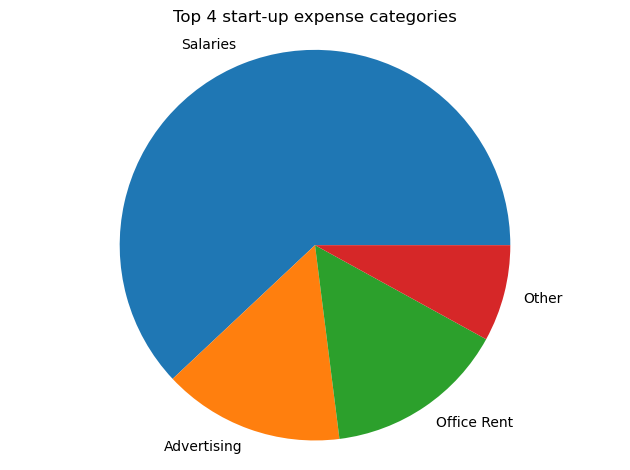

In [155]:
# Create a new DataFrame with collapsed expense categories and proportions
collapsed_expenses_data = expenses_data.copy()
collapsed_expenses_data.loc[expenses_data.Proportion < 0.15, 'Expense'] = 'Other'
print(collapsed_expenses_data)

# Store the Expense column in a variable called expense_categories and the Proportion column in a variable called proportions
collapsed_expense_cat = collapsed_expenses_data['Expense'].unique()
print(collapsed_expense_cat) # ['Salaries' 'Advertising' 'Office Rent' 'Other']
collapsed_expense_prop = collapsed_expenses_data['Proportion'].groupby(collapsed_expenses_data['Expense']).sum().sort_values(ascending = False)
print(collapsed_expense_prop)

# Pie chart of prominent expenses, collapsing the rest
plt.pie(collapsed_expense_prop, labels=collapsed_expense_cat)
plt.title('Top 4 start-up expense categories')
plt.axis('equal')  # Change 'Equal' to 'equal'
plt.tight_layout()
plt.show()
plt.clf()

### Task 11
You should now see four categories in your updated pie chart:
- Salaries
- Advertising
- Office Rent
- Other

This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.  
If the company wants to cut costs in a big way, which category do you think they should focus on? Put your answer in a string variable called expense_cut.  

In [ ]:
# category to consider to save money
expense_cut = 'Salaries'

## Employee Productivity
### Task 12
Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.  
Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.  
First, use pandas to load in employees.csv and store it in a variable called employees.  
Print the first few rows of the data.  

In [159]:
# inspect employees_data
print('Dimensions of employees_data: ', employees_data.shape) # (300, 4)
print('Headers of employees_data: ', employees_data.columns) # ['Name', 'Salary', 'Productivity', 'Commute Time']
print(employees_data.dtypes) 
print(employees_data.describe())
display(employees_data)

Dimensions of employees_data:  (300, 4)
Headers of employees_data:  Index(['Name', 'Salary', 'Productivity', 'Commute Time'], dtype='object')
Name             object
Salary            int64
Productivity    float64
Commute Time    float64
dtype: object
              Salary  Productivity  Commute Time
count     300.000000    300.000000    300.000000
mean   111766.173333     50.989100     33.441700
std     48620.292962     28.437686     16.128369
min     30530.000000      0.060000      3.220000
25%     68748.750000     27.830000     21.667500
50%    111064.000000     49.755000     31.060000
75%    153946.000000     75.810000     42.190000
max    197081.000000     99.980000    101.780000


,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58
...,...,...,...,...
295,Delmy Conatser,55465,52.61,54.34
296,Thomas Sams,160453,12.15,58.05
297,Lisabeth Naslund,164297,85.84,38.18
298,Devorah Hooser,148398,76.27,12.16


### Task 13
Notice that there is a Productivity column, which indicates the productivity score assigned to that employee.  
Sort the employees data frame (in ascending order) by the Productivity column and store the result in a variable called sorted_productivity.

In [162]:
# create productivity and sort it
sorted_productivity = employees_data.Productivity.sort_values(ascending = True)
print(sorted_productivity)

259     0.06
92      0.24
252     1.46
178     1.67
162     1.79
       ...  
164    99.54
88     99.63
23     99.66
202    99.69
6      99.98
Name: Productivity, Length: 300, dtype: float64


# Task 14
You should now see the employees with the lowest productivity scores at the top of the data frame.  
The company decides to let go of the 100 least productive employees.  
Store the first 100 rows of sorted_productivity in a new variable called employees_cut and print out the result.  
Unfortunately, this batch of employees won’t be so lucky.

In [169]:
# isolate the 100 least productive employees
employees_cut = sorted_productivity[:100]
#employees_cut = sorted_productivity.head(100) # another way of isolating the top 100 rows
print(employees_cut)

259     0.06
92      0.24
252     1.46
178     1.67
162     1.79
       ...  
43     34.52
186    34.70
288    35.21
269    35.79
218    36.36
Name: Productivity, Length: 100, dtype: float64


### Task 15
Your colleague Sarah, a data scientist at the company, would like to explore the relationship between Income and Productivity more in depth, but she points out that these two features are on vastly different scales.  
For example, productivity is a feature that ranges from 0-100, but income is measured in the thousands of dollars.  
Moreover, there are outliers in the data that add an additional layer of complexity.  
She asks you for advice on how she should transform the data. Should she perform normalization, standardization, log transformation, or something else?  
Put your answer in a string in a variable called transformation.  
Because the data contains no zero and no negative values, a log transformation can be considered however, it's mostly efficient with right-skewed data. We can test the skewness of the data using .skew() method. If skewness is greater than 1 or less than -1, the data is skewed.  
min-max normalisation doesn't handle outliers well, unlike standardisation. so the transformation really depends on how the data distributes. Boxplots highlights outliers.    
Let's plot it to figure it out.  

-0.017713903936734422


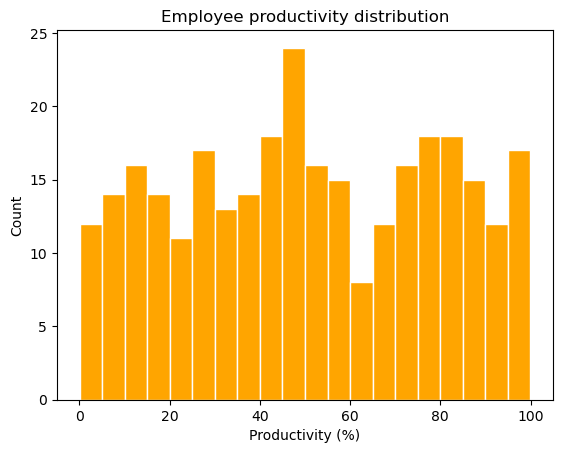

<Figure size 640x480 with 0 Axes>

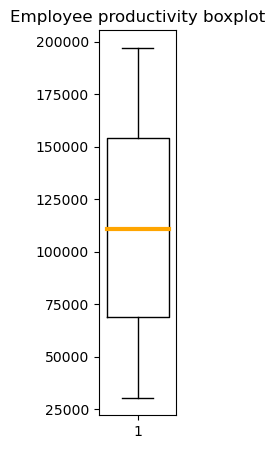

-0.0036909790534477935


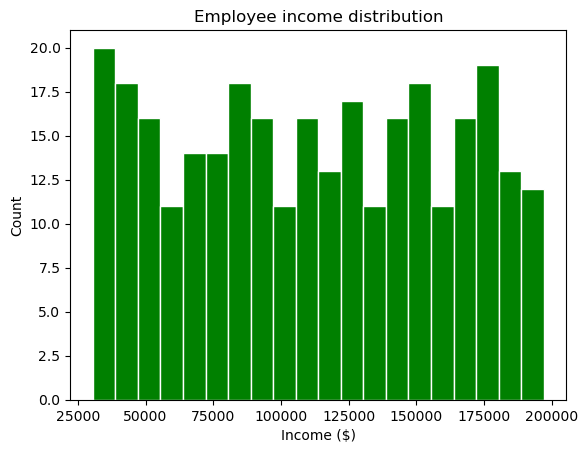

<Figure size 640x480 with 0 Axes>

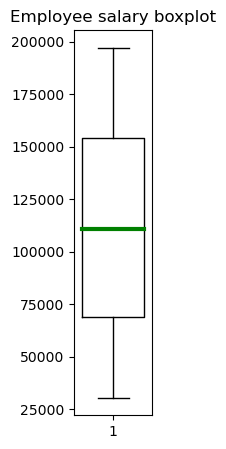

<Figure size 640x480 with 0 Axes>

In [215]:
# test the skewness of productivity
print(employees_data.Productivity.skew()) # -0.178. Not skewed
# plot the productivity distribution
plt.hist(employees_data.Productivity, color='orange', edgecolor='white', bins=20)
plt.title('Employee productivity distribution')
plt.xlabel('Productivity (%)')
plt.ylabel('Count') # Unimodal distribution with mode at 44. 
plt.show()
plt.clf()
# boxplot of productivity to determine outliers
plt.figure(figsize=(1,5))
#plt.boxplot(employees_data.Productivity, widths=0.8)
box = plt.boxplot(employees_data.Salary, widths=0.8)
plt.setp(box['medians'], color='orange', linewidth=3)  # Set the color of the median line to orange
plt.title('Employee productivity boxplot')
plt.show() # No outliers.
plt.clf()
# test the skewness of income
print(employees_data.Salary.skew()) # -0.004. Not skewed
# plot the salary distribution
plt.hist(employees_data.Salary, color='green', edgecolor='white', bins=20)
plt.title('Employee income distribution')
plt.xlabel('Income ($)')
plt.ylabel('Count')
plt.show() # Uniform distribution. No outliers.
plt.clf()
# boxplot of salary to determine outliers
plt.figure(figsize=(1, 5))
#plt.boxplot(employees_data.Salary, widths=0.8)
box = plt.boxplot(employees_data.Salary, widths=0.8)
plt.setp(box['medians'], color='green', linewidth=3)  # Set the color of the median line to green
plt.title('Employee salary boxplot')
plt.show()  # No outliers.
plt.clf()

In [ ]:
# strategy to transform data
# because the data is not skewed and has no outliers, we can apply the min-max normalisation method.
transformation = 'min-max normalisation'

I couldn't find outliers in the data but CodeCademy states there are so I'll apply a standardisation as instructed.

## Commute Times and Log Transformation
### Task 16
The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.  
He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for your help to analyze this data.  
The employees data frame has a column called Commute Time that stores the commute time (in minutes) for each employee.  
Create a variable called commute_times that stores the Commute Time column.  

In [219]:
# create a variable called commute_times that stores the Commute Time column
commute_times = employees_data['Commute Time']

0      16.79
1      44.48
2      19.40
3      42.06
4      25.58
       ...  
295    54.34
296    58.05
297    38.18
298    12.16
299    34.53
Name: Commute Time, Length: 300, dtype: float64


### Task 17
Let’s do some quick analysis on the commute times of employees.  
Use print() and .describe() to print out descriptive statistics for commute_times.  
What are the average and median commute times? Might it be worth it for the company to explore allowing remote work indefinitely so employees can save time during the day?

In [222]:
# 17/ summary statistics of commute_time
print(commute_times)
print(commute_times.describe())

0      16.79
1      44.48
2      19.40
3      42.06
4      25.58
       ...  
295    54.34
296    58.05
297    38.18
298    12.16
299    34.53
Name: Commute Time, Length: 300, dtype: float64
count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


Employee commute for 33 min on average, with a travel time ranging from 3 min to 1h22min. 50% of employees travel for up to 31 min to get to work. It is a reasonnable travel time. We do not recommend allowing remote work indefinitely. 

### Task 18 
Let’s explore the shape of the commute time data using a histogram.  
First, use plt.clf() to clear the previous plots. Then use plt.hist() to plot the histogram of commute_times. Finally, use plt.show() to show the plot. Feel free to add labels above plt.show() if you would like to practice!   
What do you notice about the shape of the data? Is it symmetric, left skewed, or right skewed?

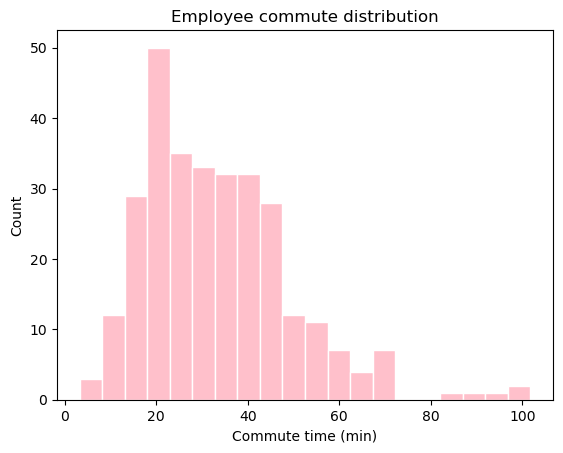

1.148400784154177


<Figure size 640x480 with 0 Axes>

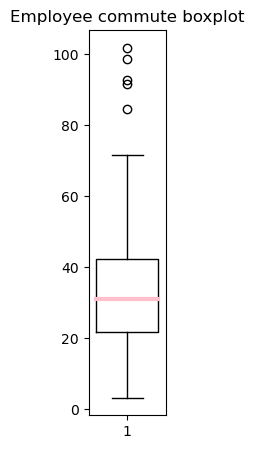

<Figure size 640x480 with 0 Axes>

In [253]:
# plot commute distribution
plt.hist(commute_times, color='pink', edgecolor='white', bins=20)
plt.title('Employee commute distribution')
plt.xlabel('Commute time (min)')
plt.ylabel('Count')
plt.show() # Unimodal right-skewed distribution. Outliers.
plt.clf()
# test for skewness of commute_times
print(commute_times.skew()) # 1.14 slightly right-skewed
# plot boxplot for outliers
plt.figure(figsize=(1, 5))
box = plt.boxplot(commute_times, widths=0.8)
plt.setp(box['medians'], color='pink', linewidth=3)  # Set the color of the median line to green
plt.title('Employee commute boxplot')
plt.show()  # Few outliers of employees with higher commute.
plt.clf()

### Task 19
The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.  
Right under the commute_times variable, create a variable called commute_times_log that stores a log-transformed version of commute_times.  
To apply log-transform, you can use numpy’s log() function.

In [229]:
# log transform commute
commute_times_log = np.log(commute_times)
print(commute_times_log)

0      2.820783
1      3.795040
2      2.965273
3      3.739097
4      3.241811
         ...   
295    3.995261
296    4.061305
297    3.642312
298    2.498152
299    3.541829
Name: Commute Time, Length: 300, dtype: float64


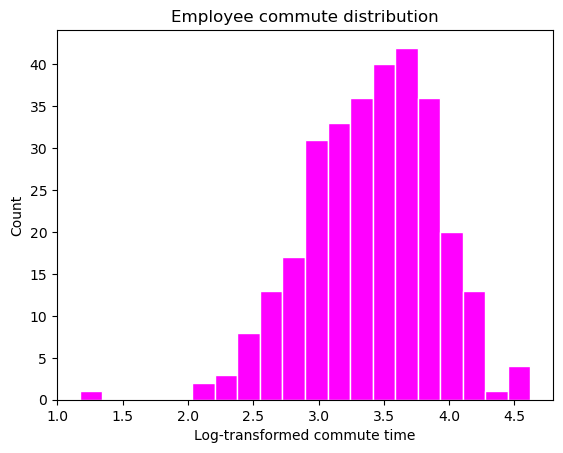

-0.4241330491752042


<Figure size 640x480 with 0 Axes>

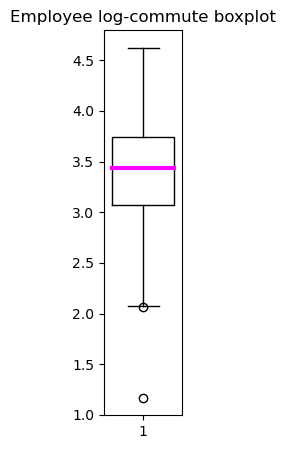

<Figure size 640x480 with 0 Axes>

In [251]:
# plot log-transformed commute distribution
plt.hist(commute_times_log, color='magenta', edgecolor='white', bins=20)
plt.title('Employee commute distribution')
plt.xlabel('Log-transformed commute time')
plt.ylabel('Count')
plt.show() # More normal distribution. Outliers.
plt.clf()
# test for skewness of commute_times_log
print(commute_times_log.skew()) # -0.42, no longer skewed
# plot boxplot for outliers
plt.figure(figsize=(1, 5))
box = plt.boxplot(commute_times_log, widths=0.8)
plt.setp(box['medians'], color='magenta', linewidth=3)  # Set the color of the median line to green
plt.title('Employee log-commute boxplot')
plt.show()  # Outliers.
plt.clf()

## Extra
### Task 21
Congratulations! In this project, you performed data analysis to help a management team answer important questions about the status of the company during a difficult time.  
You did this by analyzing data sets and applying common data transformation techniques. These are important skills to have as a data analyst.  
If you’d like extra practice with data transformations, here are some suggestions to extend this project:  
- Apply standardization to the employees data using StandardScaler() from sklearn. 
- Explore the income and productivity features in more detail. Can you find a relationship between productivity and income?

In [275]:
# Standardise employees_data
print(employees_data.columns) # ['Name', 'Salary', 'Productivity', 'Commute Time']
scaler = StandardScaler()
columns_to_scale = ['Salary', 'Productivity', 'Commute Time']  # Create a list of columns to scale
standardized_numerical_data = scaler.fit_transform(employees_data[columns_to_scale])  # Scale only the numerical columns
standardized_numerical_df = pd.DataFrame(standardized_numerical_data, columns=columns_to_scale)  # Create a DataFrame from the standardized numerical data
standardized_employees_data = pd.concat([employees_data[['Name']], standardized_numerical_df], axis=1)  # Concatenate 'Name' column with the standardized numerical data
display(standardized_employees_data)

Index(['Name', 'Salary', 'Productivity', 'Commute Time'], dtype='object')


,Name,Salary,Productivity,Commute Time
0,Mason Pender,-0.491648,-0.742477,-1.034173
1,Mia Rew,-0.331571,-0.038010,0.685546
2,Jalisa Kroenke,1.361741,0.951415,-0.872076
3,Krystal Homeyer,1.542606,-0.937966,0.535249
4,Kiana Wishart,1.140971,-1.652296,-0.488260
...,...,...,...,...
295,Delmy Conatser,-1.159912,0.057094,1.297913
296,Thomas Sams,1.003042,-1.368044,1.528327
297,Lisabeth Naslund,1.082235,1.227566,0.294278
298,Devorah Hooser,0.754686,0.890478,-1.321724


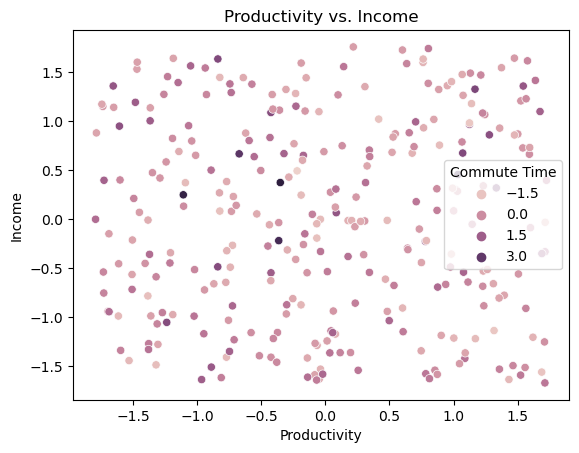

In [283]:
# Analyse standardised data
# plot productivity versus income
sns.scatterplot(data=standardized_employees_data, x='Productivity', y='Salary', hue='Commute Time')
plt.title('Productivity vs. Income')
plt.xlabel('Productivity')
plt.ylabel('Income')
plt.show() # no relationship between productivity, income and commute